In [1]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## Matplotlib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

## Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

## Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

#Data Dictionary:

CRIM per capita crime rate by town

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

PTRATIO pupil-teacher ratio by town

LSTAT % lower economic status of the population

PRICE Median value of owner-occupied homes in $1000's

In [2]:
## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics for a model
def eval_regression(y_true, y_pred, name='model'):
  """Takes true targets and predictions from a regression model and prints
  MAE, MSE, RMSE, AND R2 scores
  Set 'name' to name of model and 'train' or 'test' as appropriate"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/Boston_Housing_from_Sklearn (1).csv')
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


<Axes: >

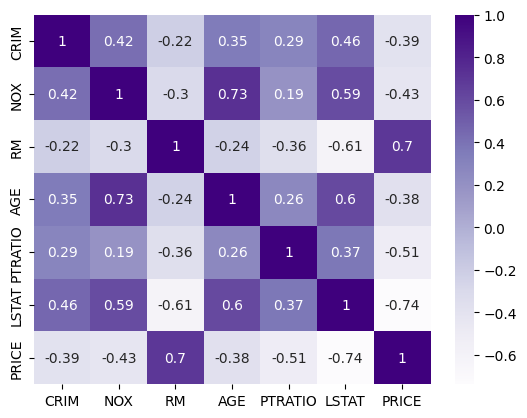

In [5]:
# Heatmap of the dataset's correlations
corr = df.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True)

Features that have a correlation coefficient of magnitude 0.5 that are positive,  negative, or greater with price are the following: "RM", "PTRATIO", and "LSTAT". 

In [6]:
# Analysis of the three highlighted features

## Print the unique values for the column
print('Unique models:\n', df['RM'].unique())
print('\n')
## Print the unique values for the column
print('Unique transmissions:\n', df['PTRATIO'].unique())
print('\n')
## Print the unique values for the column
print('Unique fuel types:\n', df['LSTAT'].unique())
print('\n')

Unique models:
 [6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 6.047 6.495 6.674 5.713 6.072 5.95  5.701 5.933 5.841 5.85
 5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03  5.399 5.602
 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927 5.741 6.456
 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961 6.065 6.245 6.273
 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167 6.389 6.63  6.015
 6.121 7.007 7.079 6.405 6.442 6.249 6.625 6.163 8.069 7.82  7.416 6.781
 6.137 5.851 5.836 6.127 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928
 6.176 6.021 5.872 5.731 5.87  5.856 5.879 5.986 5.613 5.693 6.431 5.637
 6.458 6.326 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019
 5.403 5.468 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709
 6.129 6.152 5.272 6.943 6.066 6.51  6.25  7.489 7.802 8.375 5.854 6.101
 7.929 5.877 6.319 6.402 5.875 5.88 

In [7]:
# Defining the three features most highly correlated with price for feature matrix (X) and price for target vector (y)
X = df.drop(columns = ['PRICE','CRIM','NOX','AGE'])
y = df['PRICE']

In [8]:
## Splitting data into train and test sets while using random number 42 for consistency.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# Instantiate the column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [10]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [11]:
# Create tuples
number_tuple = (scaler, num_selector)
category_tuple = (ohe, cat_selector)

In [12]:
# Create the preprocessor
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='drop', verbose_feature_names_out=False)

In [13]:
# fit on train
preprocessor.fit(X_train)

# transform train and test
X_train_processed = pd.DataFrame(preprocessor.transform(X_train),
                                 columns=preprocessor.get_feature_names_out())

X_test_processed = pd.DataFrame(preprocessor.transform(X_test),
                                 columns=preprocessor.get_feature_names_out())
# Check for missing values and that data is scaled and one-hot encoded
display(X_train_processed.head(3))
X_train_processed.info()

,RM,PTRATIO,LSTAT
0,1.156255,-0.205157,-1.077756
1,-0.238475,-1.576252,0.351165
2,2.080976,-1.487795,-1.226252


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       379 non-null    float64
 1   PTRATIO  379 non-null    float64
 2   LSTAT    379 non-null    float64
dtypes: float64(3)
memory usage: 9.0 KB


In [14]:
## Create an instance of the model
linreg = LinearRegression()
# Instantiate the model
linreg_pipe = make_pipeline(preprocessor, linreg)

In [15]:
# Fit the training set
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd0985bd120>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd0985bdbd0>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [16]:
# Model Performance
lin_train_pred = linreg_pipe.predict(X_train)
lin_test_pred = linreg_pipe.predict(X_test)

eval_regression(y_train, lin_train_pred, name='linreg_train')
eval_regression(y_test, lin_test_pred, name='linreg_test')

linreg_train Scores
MAE: 3.7141 
MSE: 27.6867 
RMSE: 5.2618 
R2: 0.6878

linreg_test Scores
MAE: 3.3918 
MSE: 25.6888 
RMSE: 5.0684 
R2: 0.6332



In [17]:
# Evaluate your model performance using R^2 on the training set and on the test set.

train_r2 = r2_score(y_train, lin_train_pred)
test_r2 = r2_score(y_test, lin_test_pred)

print(f'Training R2:{train_r2}')
print(f'Testing R2:{test_r2}')

Training R2:0.6877966145058925
Testing R2:0.6331590458194676


In [18]:
# Evaluate your model on both data sets using mean absolute error (MAE).

train_MAE = np.mean(np.abs(lin_train_pred - y_train))
test_MAE = np.mean(np.abs(lin_test_pred - y_test))

print(f'Training MAE:{train_MAE}')
print(f'Testing MAE:{test_MAE}')

Training MAE:3.714054057158005
Testing MAE:3.3918448293813976


In [19]:
# Evaluate your model on both data sets using mean squared error (MSE).

train_MSE = mean_squared_error(y_train, lin_train_pred)
test_MSE = mean_squared_error(y_test, lin_test_pred)

print(f'Training MSE:{train_MSE}')
print(f'Testing MSE:{test_MSE}')

Training MSE:27.68673681796949
Testing MSE:25.688824196675963


In [20]:
# Evaluate your model performance using RMSE on the training set and on the test set

train_RMSE = np.sqrt(np.mean(np.abs(lin_train_pred - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(lin_test_pred - y_test)**2))

print(f'Training RMSE:{train_RMSE}')
print(f'Testing RMSE:{test_RMSE}')

Training RMSE:5.261818774717492
Testing RMSE:5.0684143671049595
